In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/practice-hackathon/sample_submission.csv
/kaggle/input/practice-hackathon/Train.csv
/kaggle/input/practice-hackathon/Test.csv


In [2]:
df = pd.read_csv('../input/practice-hackathon/Train.csv')

In [3]:
df

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6
...,...,...,...,...,...,...,...,...,...
3127,F,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
3128,F,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3129,M,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3130,M,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9


Finding the categories under 'A'


In [4]:
df['A'].value_counts()

M    1149
I     992
F     991
Name: A, dtype: int64

In [5]:
df_t = pd.get_dummies(df, columns=['A'])

In [6]:
df_t

,B,C,D,E,F,G,H,Target,A_F,A_I,A_M
0,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9,1,0,0
1,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12,1,0,0
2,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10,0,0,1
3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
4,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3127,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9,1,0,0
3128,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12,1,0,0
3129,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11,0,0,1
3130,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9,0,0,1


Checking how skewed the dataset is, as Machine learning algorithms perform much better on a Gaussian dataset.

In [7]:
df_t.iloc[:,:].skew().sort_values(ascending=False)

D         4.002493
Target    1.129006
A_F       0.789879
A_I       0.788292
F         0.727789
H         0.638280
G         0.575603
A_M       0.552781
E         0.536900
C        -0.594298
B        -0.625411
dtype: float64

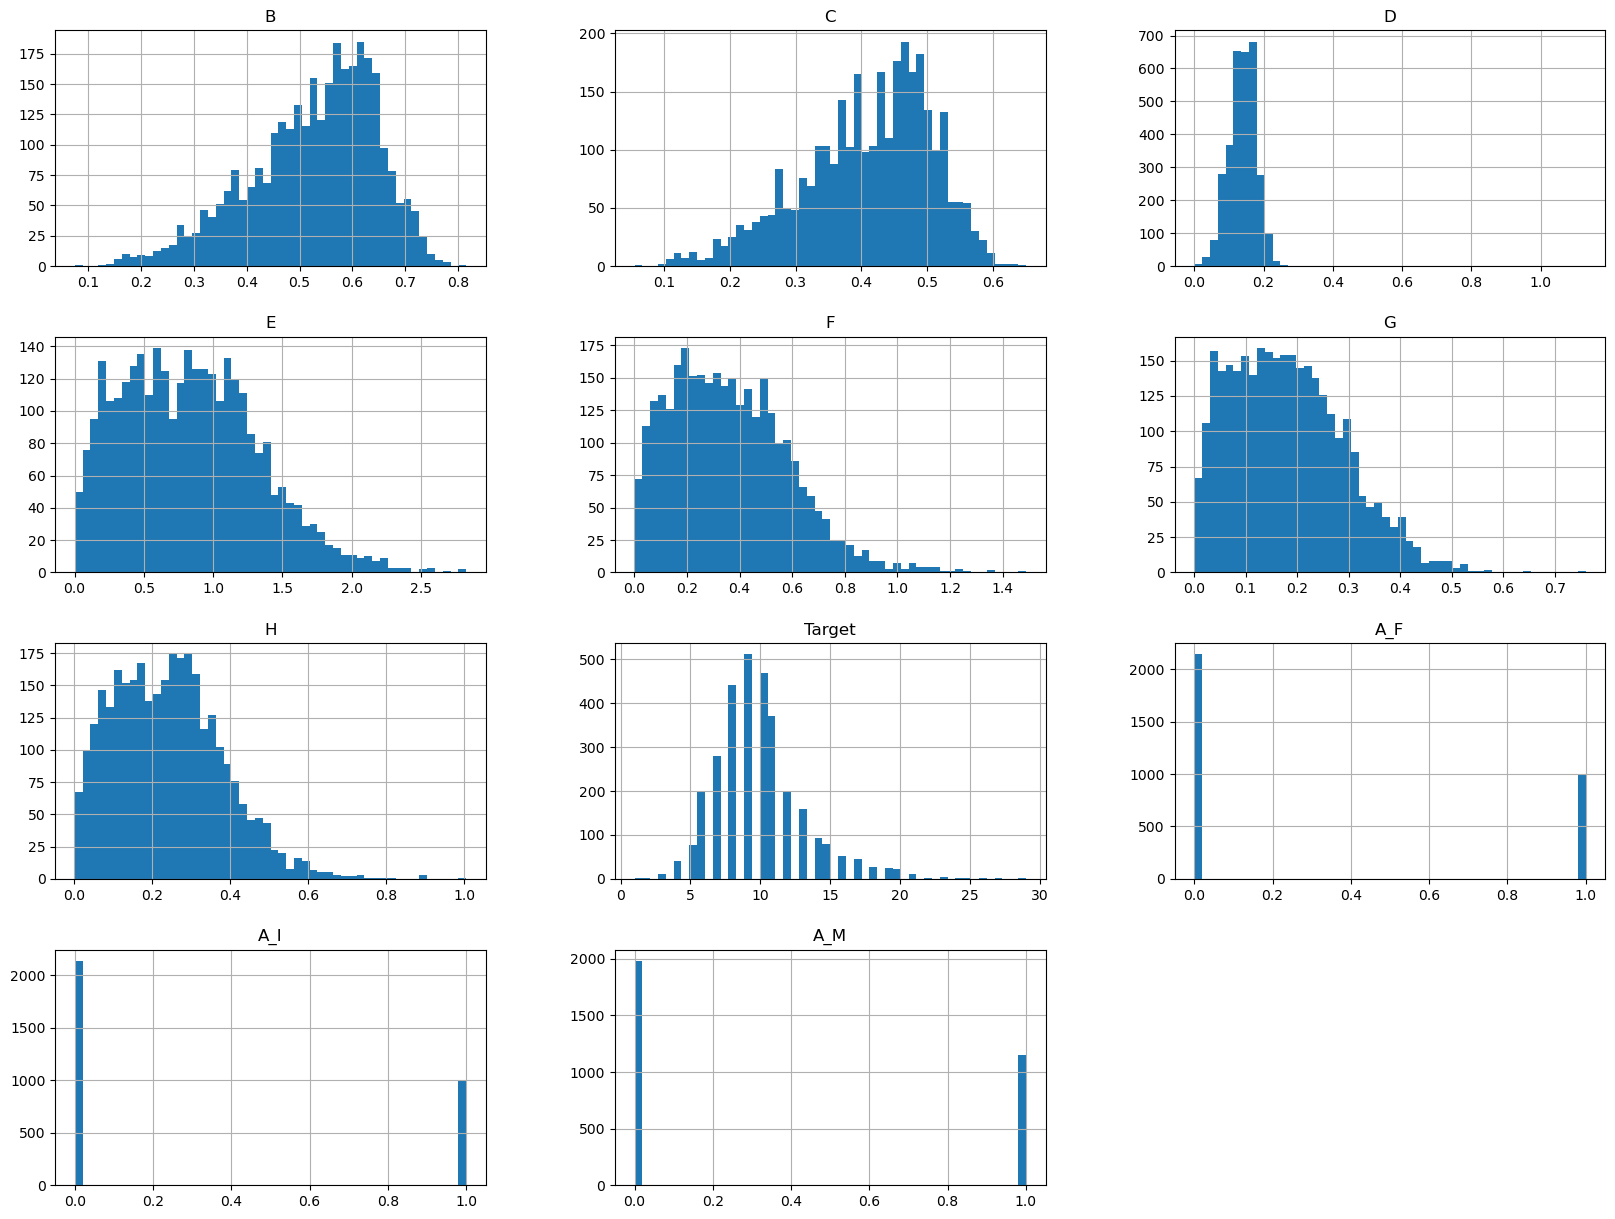

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df_t.hist(bins = 50, figsize=(20,15))
plt.show()

In [9]:
l_df_t = df_t.apply(lambda x:np.power((x/1.95),(1/3.8)))
l_df_t

,B,C,D,E,F,G,H,Target,A_F,A_I,A_M
0,0.738101,0.681833,0.495240,0.851582,0.689022,0.590244,0.596643,1.495518,0.838832,0.0,0.000000
1,0.704425,0.656926,0.500002,0.759631,0.600617,0.485821,0.563156,1.613133,0.838832,0.0,0.000000
2,0.751946,0.709768,0.530243,0.946608,0.774792,0.636585,0.661262,1.537563,0.000000,0.0,0.838832
3,0.681833,0.643412,0.451497,0.704065,0.566164,0.458833,0.509163,1.710696,0.000000,0.0,0.838832
4,0.697121,0.659104,0.513576,0.793196,0.572695,0.475320,0.636346,1.344162,0.000000,0.0,0.838832
...,...,...,...,...,...,...,...,...,...,...,...
3127,0.695261,0.659104,0.474778,0.723154,0.586069,0.492810,0.504641,1.495518,0.838832,0.0,0.000000
3128,0.754928,0.716720,0.541843,0.914854,0.714135,0.612916,0.659104,1.613133,0.838832,0.0,0.000000
3129,0.702619,0.656926,0.485311,0.726972,0.578711,0.493786,0.540336,1.576616,0.000000,0.0,0.838832
3130,0.725153,0.685745,0.480125,0.850416,0.704785,0.562143,0.573016,1.495518,0.000000,0.0,0.838832


In [10]:

l_df_t

,B,C,D,E,F,G,H,Target,A_F,A_I,A_M
0,0.738101,0.681833,0.495240,0.851582,0.689022,0.590244,0.596643,1.495518,0.838832,0.0,0.000000
1,0.704425,0.656926,0.500002,0.759631,0.600617,0.485821,0.563156,1.613133,0.838832,0.0,0.000000
2,0.751946,0.709768,0.530243,0.946608,0.774792,0.636585,0.661262,1.537563,0.000000,0.0,0.838832
3,0.681833,0.643412,0.451497,0.704065,0.566164,0.458833,0.509163,1.710696,0.000000,0.0,0.838832
4,0.697121,0.659104,0.513576,0.793196,0.572695,0.475320,0.636346,1.344162,0.000000,0.0,0.838832
...,...,...,...,...,...,...,...,...,...,...,...
3127,0.695261,0.659104,0.474778,0.723154,0.586069,0.492810,0.504641,1.495518,0.838832,0.0,0.000000
3128,0.754928,0.716720,0.541843,0.914854,0.714135,0.612916,0.659104,1.613133,0.838832,0.0,0.000000
3129,0.702619,0.656926,0.485311,0.726972,0.578711,0.493786,0.540336,1.576616,0.000000,0.0,0.838832
3130,0.725153,0.685745,0.480125,0.850416,0.704785,0.562143,0.573016,1.495518,0.000000,0.0,0.838832


We can see that the skew values have decreased, so our algorithm will perform better now.

In [11]:
l_df_t.iloc[:,:].skew().sort_values(ascending=False)

A_F       0.789879
A_I       0.788292
A_M       0.552781
Target    0.142606
F        -0.620619
G        -0.647747
E        -0.679737
H        -0.682024
C        -1.202917
B        -1.222585
D        -1.601500
dtype: float64

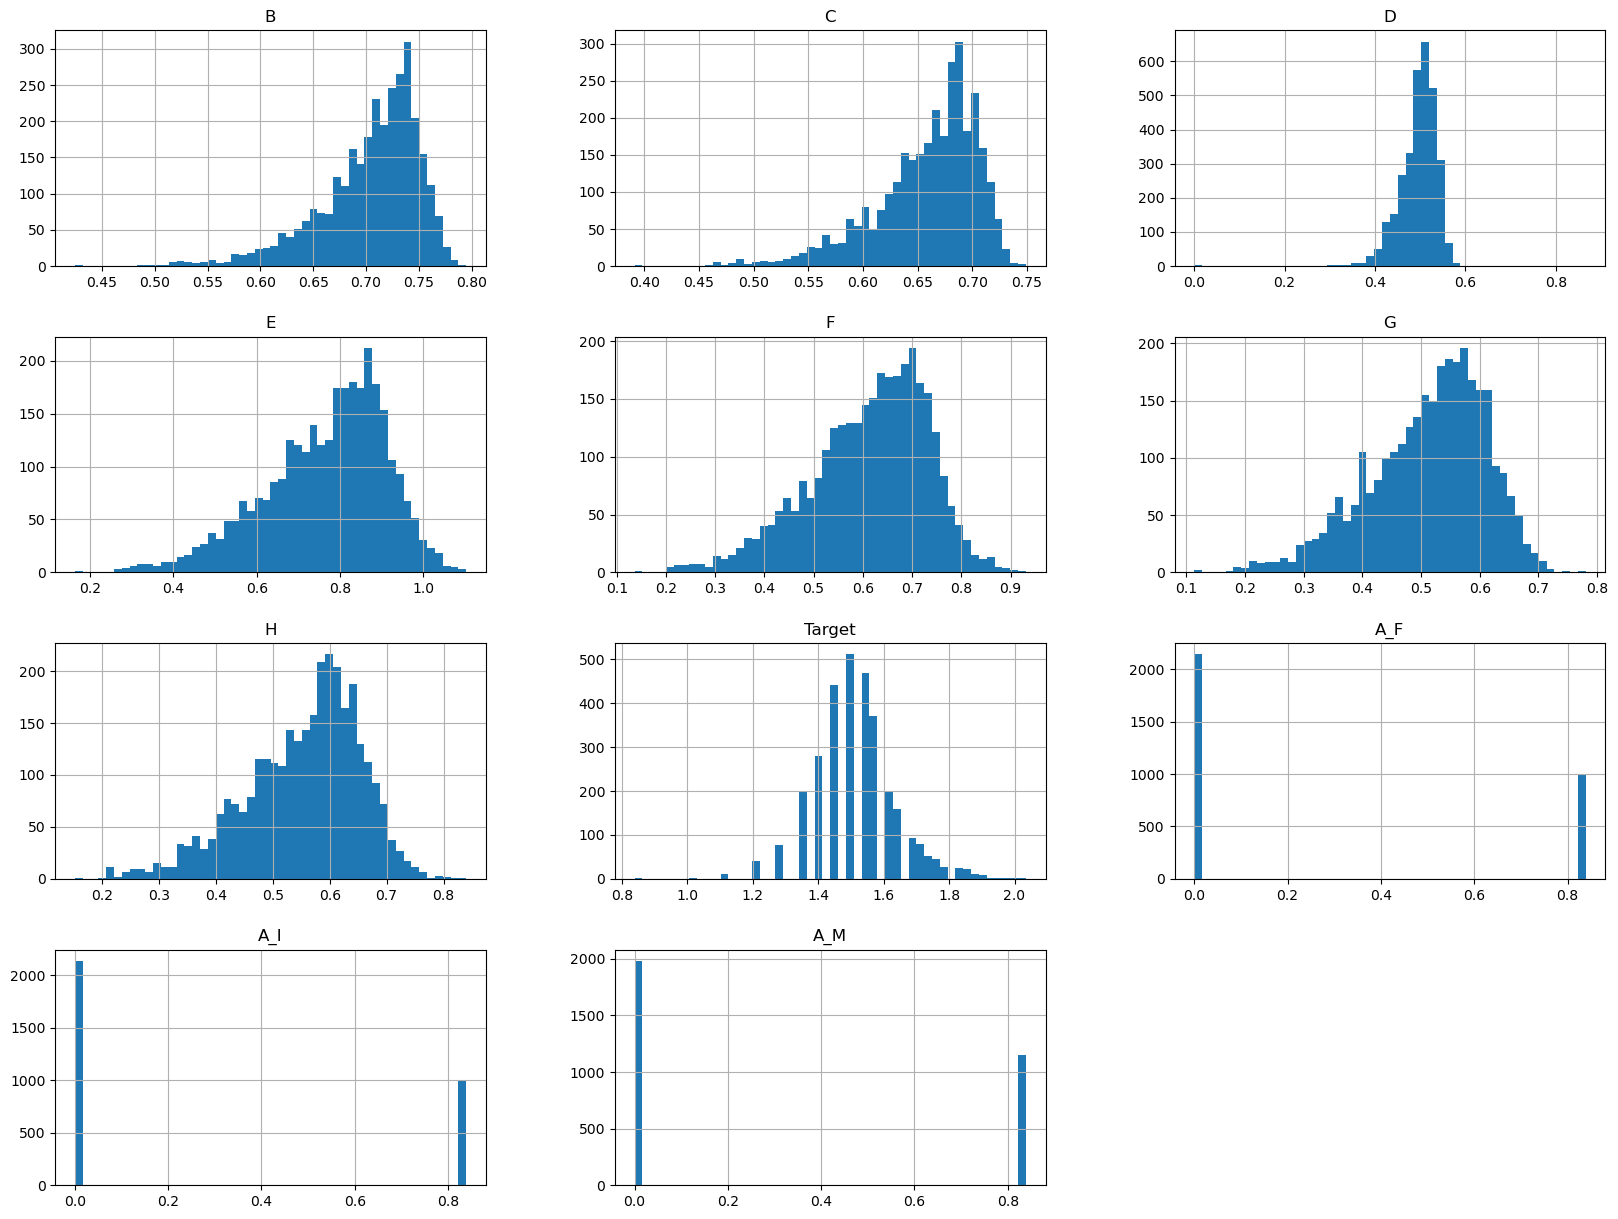

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
l_df_t.hist(bins = 50, figsize=(20,15))
plt.show()

Checking various correlations in our data to see which features could be useful for our purpose

In [13]:
corr = l_df_t.corr()
corr.style.background_gradient(cmap='coolwarm')

,B,C,D,E,F,G,H,Target,A_F,A_I,A_M
B,1.000000,0.989670,0.873247,0.975021,0.962921,0.958696,0.959066,0.638776,0.298948,-0.523022,0.216366
C,0.989670,1.000000,0.876795,0.973930,0.958646,0.956076,0.962540,0.653154,0.309068,-0.536533,0.219642
D,0.873247,0.876795,1.000000,0.886805,0.859214,0.874193,0.878624,0.644526,0.301523,-0.525947,0.216705
E,0.975021,0.973930,0.886805,1.000000,0.984378,0.980455,0.977728,0.651345,0.313557,-0.568131,0.245810
F,0.962921,0.958646,0.859214,0.984378,1.000000,0.961179,0.940821,0.569582,0.287124,-0.537622,0.241869
G,0.958696,0.956076,0.874193,0.980455,0.961179,1.000000,0.951720,0.631354,0.323681,-0.572989,0.240730
H,0.959066,0.962540,0.878624,0.977728,0.940821,0.951720,1.000000,0.709769,0.318632,-0.563613,0.236552
Target,0.638776,0.653154,0.644526,0.651345,0.569582,0.631354,0.709769,1.000000,0.262219,-0.460463,0.191425
A_F,0.298948,0.309068,0.301523,0.313557,0.287124,0.323681,0.318632,0.262219,1.000000,-0.463209,-0.517878
A_I,-0.523022,-0.536533,-0.525947,-0.568131,-0.537622,-0.572989,-0.563613,-0.460463,-0.463209,1.000000,-0.518260


In [14]:
features = ['B','C','E','F','G','H','A_F','A_I','A_M','D']

Looking for outliers

<Axes: >

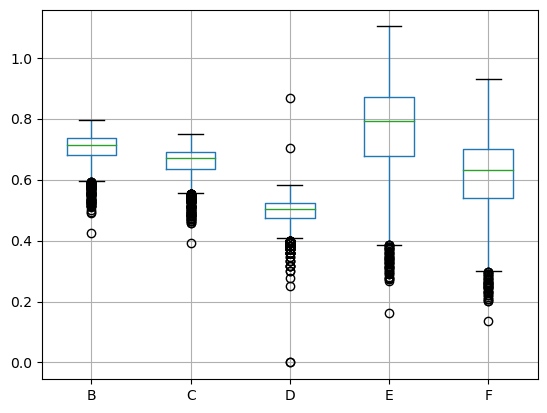

In [15]:
l_df_t.boxplot(column = ['B','C','D','E','F'])

In [16]:
l_df_t

,B,C,D,E,F,G,H,Target,A_F,A_I,A_M
0,0.738101,0.681833,0.495240,0.851582,0.689022,0.590244,0.596643,1.495518,0.838832,0.0,0.000000
1,0.704425,0.656926,0.500002,0.759631,0.600617,0.485821,0.563156,1.613133,0.838832,0.0,0.000000
2,0.751946,0.709768,0.530243,0.946608,0.774792,0.636585,0.661262,1.537563,0.000000,0.0,0.838832
3,0.681833,0.643412,0.451497,0.704065,0.566164,0.458833,0.509163,1.710696,0.000000,0.0,0.838832
4,0.697121,0.659104,0.513576,0.793196,0.572695,0.475320,0.636346,1.344162,0.000000,0.0,0.838832
...,...,...,...,...,...,...,...,...,...,...,...
3127,0.695261,0.659104,0.474778,0.723154,0.586069,0.492810,0.504641,1.495518,0.838832,0.0,0.000000
3128,0.754928,0.716720,0.541843,0.914854,0.714135,0.612916,0.659104,1.613133,0.838832,0.0,0.000000
3129,0.702619,0.656926,0.485311,0.726972,0.578711,0.493786,0.540336,1.576616,0.000000,0.0,0.838832
3130,0.725153,0.685745,0.480125,0.850416,0.704785,0.562143,0.573016,1.495518,0.000000,0.0,0.838832


In [17]:
target = l_df_t['Target']
df_m = l_df_t.loc[:,features]

In [18]:
df_m

,B,C,E,F,G,H,A_F,A_I,A_M,D
0,0.738101,0.681833,0.851582,0.689022,0.590244,0.596643,0.838832,0.0,0.000000,0.495240
1,0.704425,0.656926,0.759631,0.600617,0.485821,0.563156,0.838832,0.0,0.000000,0.500002
2,0.751946,0.709768,0.946608,0.774792,0.636585,0.661262,0.000000,0.0,0.838832,0.530243
3,0.681833,0.643412,0.704065,0.566164,0.458833,0.509163,0.000000,0.0,0.838832,0.451497
4,0.697121,0.659104,0.793196,0.572695,0.475320,0.636346,0.000000,0.0,0.838832,0.513576
...,...,...,...,...,...,...,...,...,...,...
3127,0.695261,0.659104,0.723154,0.586069,0.492810,0.504641,0.838832,0.0,0.000000,0.474778
3128,0.754928,0.716720,0.914854,0.714135,0.612916,0.659104,0.838832,0.0,0.000000,0.541843
3129,0.702619,0.656926,0.726972,0.578711,0.493786,0.540336,0.000000,0.0,0.838832,0.485311
3130,0.725153,0.685745,0.850416,0.704785,0.562143,0.573016,0.000000,0.0,0.838832,0.480125


In [19]:
target

0       1.495518
1       1.613133
2       1.537563
3       1.710696
4       1.344162
          ...   
3127    1.495518
3128    1.613133
3129    1.576616
3130    1.495518
3131    1.344162
Name: Target, Length: 3132, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_m, target, test_size=0.3, random_state=0)

Now we use polynomial regression on our dataset. After transforming the data to produce polynomial features, standard scaler is applied as feature scaling drastically improves performance.Note that Ridge Regression is used to prevent overfitting.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train)
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.0001)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_poly)
reg.fit(X_norm, y_train)

Ridge(alpha=0.0001)

In [22]:
pred = reg.predict(X_norm)

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,pred)

0.005604144538241015

In [24]:
X_poly_test = poly.fit_transform(X_test)
X_norm_test = scaler.fit_transform(X_poly_test)
pred_test = reg.predict(X_norm_test)
mean_squared_error(y_test,pred_test)

0.00589438467315036

So after looking at the MSE of both the test and the train datasets, we can conclude there has not been any overfitting and variance is under control.

In [25]:
ts = pd.read_csv('../input/practice-hackathon/Test.csv')

In [26]:
ts

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215
...,...,...,...,...,...,...,...,...,...
1040,532,I,0.470,0.370,0.120,0.4705,0.1845,0.1055,0.155
1041,3417,M,0.580,0.460,0.150,1.0165,0.4910,0.2210,0.265
1042,1505,M,0.635,0.510,0.185,1.3080,0.5440,0.3180,0.377
1043,2245,M,0.460,0.375,0.140,0.5105,0.1920,0.1045,0.205


In [27]:
ts_c = pd.get_dummies(ts, columns=['A'])
ts_c

,Index,B,C,D,E,F,G,H,A_F,A_I,A_M
0,866,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,0,0,1
1,1483,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245,0,0,1
2,599,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335,1,0,0
3,1702,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380,1,0,0
4,670,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1040,532,0.470,0.370,0.120,0.4705,0.1845,0.1055,0.155,0,1,0
1041,3417,0.580,0.460,0.150,1.0165,0.4910,0.2210,0.265,0,0,1
1042,1505,0.635,0.510,0.185,1.3080,0.5440,0.3180,0.377,0,0,1
1043,2245,0.460,0.375,0.140,0.5105,0.1920,0.1045,0.205,0,0,1


Applying the same transformation on the test data

In [28]:
l_ts_c = ts_c.apply(lambda x:np.power((x/1.95),(1/3.8)))

In [29]:
l_ts_c

,Index,B,C,D,E,F,G,H,A_F,A_I,A_M
0,4.974004,0.734924,0.681833,0.517885,0.860857,0.668039,0.611851,0.624056,0.000000,0.000000,0.838832
1,5.730413,0.730084,0.675845,0.509163,0.809258,0.653398,0.559759,0.579334,0.000000,0.000000,0.838832
2,4.514159,0.720127,0.677857,0.545559,0.834608,0.613712,0.566164,0.629053,0.838832,0.000000,0.000000
3,5.941931,0.744344,0.695261,0.526213,0.891712,0.712746,0.592301,0.650267,0.838832,0.000000,0.000000
4,4.649208,0.689596,0.652508,0.504641,0.738890,0.573016,0.466996,0.559759,0.000000,0.000000,0.838832
...,...,...,...,...,...,...,...,...,...,...,...
1040,4.375425,0.687678,0.645720,0.480125,0.687870,0.537671,0.464126,0.513576,0.000000,0.838832,0.000000
1041,7.138084,0.726807,0.683797,0.509163,0.842453,0.695634,0.563828,0.591422,0.000000,0.000000,0.838832
1042,5.752663,0.744344,0.702619,0.538054,0.900246,0.714654,0.620490,0.648912,0.000000,0.000000,0.838832
1043,6.391078,0.683797,0.648005,0.500002,0.702800,0.543338,0.462965,0.552787,0.000000,0.000000,0.838832


In [30]:
l_ts_c['Index'] = ts_c['Index']
l_ts_c

,Index,B,C,D,E,F,G,H,A_F,A_I,A_M
0,866,0.734924,0.681833,0.517885,0.860857,0.668039,0.611851,0.624056,0.000000,0.000000,0.838832
1,1483,0.730084,0.675845,0.509163,0.809258,0.653398,0.559759,0.579334,0.000000,0.000000,0.838832
2,599,0.720127,0.677857,0.545559,0.834608,0.613712,0.566164,0.629053,0.838832,0.000000,0.000000
3,1702,0.744344,0.695261,0.526213,0.891712,0.712746,0.592301,0.650267,0.838832,0.000000,0.000000
4,670,0.689596,0.652508,0.504641,0.738890,0.573016,0.466996,0.559759,0.000000,0.000000,0.838832
...,...,...,...,...,...,...,...,...,...,...,...
1040,532,0.687678,0.645720,0.480125,0.687870,0.537671,0.464126,0.513576,0.000000,0.838832,0.000000
1041,3417,0.726807,0.683797,0.509163,0.842453,0.695634,0.563828,0.591422,0.000000,0.000000,0.838832
1042,1505,0.744344,0.702619,0.538054,0.900246,0.714654,0.620490,0.648912,0.000000,0.000000,0.838832
1043,2245,0.683797,0.648005,0.500002,0.702800,0.543338,0.462965,0.552787,0.000000,0.000000,0.838832


In [31]:
ts_test = l_ts_c.loc[:,features]
ts_poly = poly.fit_transform(ts_test)
ts_norm = scaler.fit_transform(ts_poly)

In [32]:
predictions = reg.predict(ts_norm)
predictions

array([1.59564046, 1.52587955, 1.73383864, ..., 1.59213813, 1.60801731,
       1.51063346])

Retransforming to get the actual values of the predictions our model is making

In [33]:
predictions_res = (predictions ** 3.8)*1.95

In [34]:
predictions_res

array([11.51298028,  9.71430125, 15.78583592, ..., 11.41724792,
       11.85603146,  9.35059369])

In [35]:
result = pd.DataFrame(l_ts_c['Index'], columns = ['Index'])
result['Target'] = predictions_res

In [36]:
result

,Index,Target
0,866,11.512980
1,1483,9.714301
2,599,15.785836
3,1702,11.173040
4,670,11.575964
...,...,...
1040,532,9.298452
1041,3417,9.682432
1042,1505,11.417248
1043,2245,11.856031


In [37]:
result.to_csv("submission21.csv", index=False)